# Exploratory Data Analysis and Basic Network Measures

#### Izolda Fetko & Moeen Arshad

In [2]:
#
#Network Science - Air Traffic Data Preparation
#

import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import seaborn as sns
import numpy as np
import csv
import pandas as pd
%matplotlib inline
import networkx as nx
from statistics import mean
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
from wordcloud import WordCloud



## Data Preparation

### Data Preparation - Import Data

#### Define Dataset Directories and Dataframe Headers

Source

In [43]:
#routes
routefilepath = r"C:\Users\201476\Documents\IU\Network Science\Project\ProjectDataSet\InputData_RawData\routes.dat"

#airports
airportfilepath = r"C:\Users\201476\Documents\IU\Network Science\Project\ProjectDataSet\InputData_RawData\airports.dat"

#airlines
airlinefilepath = r"C:\Users\201476\Documents\IU\Network Science\Project\ProjectDataSet\InputData_RawData\airlines.dat"

#planes (equipment)
planesfilepath = r"C:\Users\201476\Documents\IU\Network Science\Project\ProjectDataSet\InputData_RawData\planes.dat"


Target

In [111]:
#target output for master file
targetoutput = r"C:\Users\201476\Documents\IU\Network Science\Project\ProjectDataSet\InputData_RawData\air_traffic.csv"

#target output - airport nodes (Gephi)
gephi_airportnodes = r"C:\Users\201476\Documents\IU\Network Science\Project\ProjectDataSet\InputData_RawData\gephi_airportnodes.csv"

#target output - routes edges (Gephi)
gephi_routesedges = r"C:\Users\201476\Documents\IU\Network Science\Project\ProjectDataSet\InputData_RawData\gephi_routesedges.csv"


Headers

In [112]:
#HEADERS
#routes
routes_headers = ['Airline', 'Airline_ID', 'Source_Airport', 'Source_Airport_ID', 'Dest_Airport', 'Dest_Airport_ID', 'Codeshare', 'Stops', 'Equipment']

#airports
airport_general_headers = ['Airport_ID', 'Airport_Name', 'Airport_City', 'Airport_Country', 'Airport_IATA', 'Airport_ICAO', 'Airport_Latitude', 'Airport_Longitude', 'Airport_Altitude', 'Airport_Timezone', 'Airport_DST', 'Airport_Tz', 'Airport_Type', 'Data_Source']
source_airport_headers = ['Source_Airport_ID', 'Source_Airport_Name', 'Source_Airport_City', 'Source_Airport_Country', 'Source_Airport_IATA', 'Source_Airport_ICAO', 'Source_Airport_Latitude', 'Source_Airport_Longitude', 'Source_Airport_Altitude', 'Source_Airport_Timezone', 'Source_Airport_DST', 'Source_Airport_Tz', 'Source_Airport_Type', 'Source_Airport_Data_Source']
dest_airport_headers = ['Dest_Airport_ID', 'Dest_Airport_Name', 'Dest_Airport_City', 'Dest_Airport_Country', 'Dest_Airport_IATA', 'Dest_Airport_ICAO', 'Dest_Airport_Latitude', 'Dest_Airport_Longitude', 'Dest_Airport_Altitude', 'Dest_Airport_Timezone', 'Dest_Airport_DST', 'Dest_Airport_Tz', 'Dest_Airport_Type', 'Dest_Airport_Data_Source']

#airlines
airline_headers = ['Airline_ID', 'Airline_Name', 'Airline_Alias', 'Airline_IATA', 'Airline_ICAO', 'Airline_Callsign', 'Airline_Country', 'Airline_Active']

#planes (equipment)
plane_headers = ['Plane_Name', 'Plane_IATA', 'Plane_ICAO']


#### Import Routes Data

In [29]:
#importing routes data
routes_df = pd.read_csv(routefilepath, header=None, names = routes_headers)
routes_df.head()
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
Airline              67663 non-null object
Airline_ID           67663 non-null object
Source_Airport       67663 non-null object
Source_Airport_ID    67663 non-null object
Dest_Airport         67663 non-null object
Dest_Airport_ID      67663 non-null object
Codeshare            14597 non-null object
Stops                67663 non-null int64
Equipment            67645 non-null object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [30]:
# unique Source Airports in routes dataset
sa= routes_df['Source_Airport'].unique().tolist()
print(len(sa))

3409


#### Import Airport Data

In [31]:
#importing source airport data
source_airport_df = pd.read_csv(airportfilepath, header=None, names = source_airport_headers)
source_airport_df.head()
source_airport_df.info()

#convert Source Airport ID from int to string
source_airport_df['Source_Airport_ID'] = source_airport_df['Source_Airport_ID'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 14 columns):
Source_Airport_ID             7543 non-null int64
Source_Airport_Name           7543 non-null object
Source_Airport_City           7495 non-null object
Source_Airport_Country        7543 non-null object
Source_Airport_IATA           7543 non-null object
Source_Airport_ICAO           7543 non-null object
Source_Airport_Latitude       7543 non-null float64
Source_Airport_Longitude      7543 non-null float64
Source_Airport_Altitude       7543 non-null int64
Source_Airport_Timezone       7543 non-null object
Source_Airport_DST            7543 non-null object
Source_Airport_Tz             7543 non-null object
Source_Airport_Type           7543 non-null object
Source_Airport_Data_Source    7543 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 825.1+ KB


In [32]:
# unique number of airports in source airport data
source_airports_unique = source_airport_df['Source_Airport_ID'].unique().tolist()
print(len(source_airports_unique))

#Note. Not every airport listed in the airports.dat file is included in the routes.dat dataset

7543


In [33]:
#importing destination airport data
dest_airport_df = pd.read_csv(airportfilepath, header=None, names = dest_airport_headers)
dest_airport_df.head()
dest_airport_df.info()
#convert Dest Airport ID from int to string
dest_airport_df['Dest_Airport_ID'] = dest_airport_df['Dest_Airport_ID'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 14 columns):
Dest_Airport_ID             7543 non-null int64
Dest_Airport_Name           7543 non-null object
Dest_Airport_City           7495 non-null object
Dest_Airport_Country        7543 non-null object
Dest_Airport_IATA           7543 non-null object
Dest_Airport_ICAO           7543 non-null object
Dest_Airport_Latitude       7543 non-null float64
Dest_Airport_Longitude      7543 non-null float64
Dest_Airport_Altitude       7543 non-null int64
Dest_Airport_Timezone       7543 non-null object
Dest_Airport_DST            7543 non-null object
Dest_Airport_Tz             7543 non-null object
Dest_Airport_Type           7543 non-null object
Dest_Airport_Data_Source    7543 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 825.1+ KB


In [34]:
# unique number of airports in dest airports dataset
dest_airports_unique = dest_airport_df['Dest_Airport_ID'].unique().tolist()
print(len(dest_airports_unique))

7543


#### Import Airlines Data

In [35]:
#importing airlines data
airline_df = pd.read_csv(airlinefilepath, header=None, names = airline_headers)
airline_df.head()
airline_df.info()
#convert Airline ID from int to string
airline_df['Airline_ID'] = airline_df['Airline_ID'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
Airline_ID          6162 non-null int64
Airline_Name        6162 non-null object
Airline_Alias       5656 non-null object
Airline_IATA        1535 non-null object
Airline_ICAO        6075 non-null object
Airline_Callsign    5354 non-null object
Airline_Country     6147 non-null object
Airline_Active      6162 non-null object
dtypes: int64(1), object(7)
memory usage: 385.2+ KB


In [36]:
# unique number of airlines in airline data
airlines_unique = airline_df['Airline_ID'].unique().tolist()
print(len(airlines_unique))

6162


#### Import Plane Data

In [37]:
#importing planes data
plane_df = pd.read_csv(planesfilepath, header=None, names = plane_headers)
plane_df.head()
plane_df.info()

#include based on route data, the IATA column most closely conforms to plane lookups. 
#note that future work will require parsing  the routes_df['Equipment'] field for a horizontal lookup on planes. This is for the records with multiple plane types on the same route record.
plane_df['Equipment'] = plane_df['Plane_IATA']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
Plane_Name    174 non-null object
Plane_IATA    174 non-null object
Plane_ICAO    174 non-null object
dtypes: object(3)
memory usage: 4.2+ KB


### Data Preparation - Merge Data

(Note: Left Joins to the Route data is used to preserve route information when data is not present in dimension lookups.)

In [38]:
#run the following code to wipe air_master_df clean if needed
air_master_df =  pd.DataFrame() 


In [39]:
#merge airline data to route data - creating the initial master dataframe.
air_master_df = pd.merge(routes_df, airline_df, on='Airline_ID', how='left')
air_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67663 entries, 0 to 67662
Data columns (total 16 columns):
Airline              67663 non-null object
Airline_ID           67663 non-null object
Source_Airport       67663 non-null object
Source_Airport_ID    67663 non-null object
Dest_Airport         67663 non-null object
Dest_Airport_ID      67663 non-null object
Codeshare            14597 non-null object
Stops                67663 non-null int64
Equipment            67645 non-null object
Airline_Name         67184 non-null object
Airline_Alias        63548 non-null object
Airline_IATA         67075 non-null object
Airline_ICAO         67021 non-null object
Airline_Callsign     63643 non-null object
Airline_Country      67184 non-null object
Airline_Active       67184 non-null object
dtypes: int64(1), object(15)
memory usage: 8.8+ MB


In [40]:
#merge source airport data to master
air_master_df = pd.merge(air_master_df, source_airport_df, on='Source_Airport_ID', how='left')
air_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67663 entries, 0 to 67662
Data columns (total 29 columns):
Airline                       67663 non-null object
Airline_ID                    67663 non-null object
Source_Airport                67663 non-null object
Source_Airport_ID             67663 non-null object
Dest_Airport                  67663 non-null object
Dest_Airport_ID               67663 non-null object
Codeshare                     14597 non-null object
Stops                         67663 non-null int64
Equipment                     67645 non-null object
Airline_Name                  67184 non-null object
Airline_Alias                 63548 non-null object
Airline_IATA                  67075 non-null object
Airline_ICAO                  67021 non-null object
Airline_Callsign              63643 non-null object
Airline_Country               67184 non-null object
Airline_Active                67184 non-null object
Source_Airport_Name           66836 non-null object
Source_A

In [41]:
#merge destination airport data to master
air_master_df = pd.merge(air_master_df, dest_airport_df, on='Dest_Airport_ID', how='left')
air_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67663 entries, 0 to 67662
Data columns (total 42 columns):
Airline                       67663 non-null object
Airline_ID                    67663 non-null object
Source_Airport                67663 non-null object
Source_Airport_ID             67663 non-null object
Dest_Airport                  67663 non-null object
Dest_Airport_ID               67663 non-null object
Codeshare                     14597 non-null object
Stops                         67663 non-null int64
Equipment                     67645 non-null object
Airline_Name                  67184 non-null object
Airline_Alias                 63548 non-null object
Airline_IATA                  67075 non-null object
Airline_ICAO                  67021 non-null object
Airline_Callsign              63643 non-null object
Airline_Country               67184 non-null object
Airline_Active                67184 non-null object
Source_Airport_Name           66836 non-null object
Source_A

In [42]:
#merge plane data to master -- see note above near plane_df code.
air_master_df = pd.merge(air_master_df, plane_df, on='Equipment', how='left')
air_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67759 entries, 0 to 67758
Data columns (total 45 columns):
Airline                       67759 non-null object
Airline_ID                    67759 non-null object
Source_Airport                67759 non-null object
Source_Airport_ID             67759 non-null object
Dest_Airport                  67759 non-null object
Dest_Airport_ID               67759 non-null object
Codeshare                     14631 non-null object
Stops                         67759 non-null int64
Equipment                     67741 non-null object
Airline_Name                  67265 non-null object
Airline_Alias                 63629 non-null object
Airline_IATA                  67156 non-null object
Airline_ICAO                  67096 non-null object
Airline_Callsign              63718 non-null object
Airline_Country               67265 non-null object
Airline_Active                67265 non-null object
Source_Airport_Name           66926 non-null object
Source_A

In [47]:
#export results to csv
air_master_df.to_csv(targetoutput, index=False)

In [48]:
air_master_df.head()

,Airline,Airline_ID,Source_Airport,Source_Airport_ID,Dest_Airport,Dest_Airport_ID,Codeshare,Stops,Equipment,Airline_Name,...,Dest_Airport_Longitude,Dest_Airport_Altitude,Dest_Airport_Timezone,Dest_Airport_DST,Dest_Airport_Tz,Dest_Airport_Type,Dest_Airport_Data_Source,Plane_Name,Plane_IATA,Plane_ICAO
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,Aerocondor,...,49.278702,411.0,3,N,Europe/Moscow,airport,OurAirports,Canadair Regional Jet 200,CR2,CRJ2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,Aerocondor,...,49.278702,411.0,3,N,Europe/Moscow,airport,OurAirports,Canadair Regional Jet 200,CR2,CRJ2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,Aerocondor,...,43.081902,1054.0,3,N,Europe/Moscow,airport,OurAirports,Canadair Regional Jet 200,CR2,CRJ2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,Aerocondor,...,49.278702,411.0,3,N,Europe/Moscow,airport,OurAirports,Canadair Regional Jet 200,CR2,CRJ2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,Aerocondor,...,82.650703,365.0,7,N,Asia/Krasnoyarsk,airport,OurAirports,Canadair Regional Jet 200,CR2,CRJ2


### Data Preparation - Gephi Consumable Format

This section prepares routes and aiport data into gephi-friendly formats, to be referenced later in the reporting analysis phase. 
By defining airports as nodes, and routes as edges, we will later import these csv outputs into Gephi for further analysis

Nodes (Airports)

In [143]:
#importing just airport data for gephi nodes
gephi_airport_df = pd.read_csv(airportfilepath, header=None, names = airport_general_headers)
#gephi_airport_df.info()

#convert Source Airport ID from int to string
gephi_airport_df['Airport_ID'] = gephi_airport_df['Airport_ID'].astype(str)

gephi_airport_df['id']=gephi_airport_df['Airport_ID']
#gephi_airport_df.head()


In [144]:
#reorder columns

gephi_airport_df = gephi_airport_df[['id',
                         'Airport_ID',
                         'Airport_Name', 
                         'Airport_City', 
                         'Airport_Country', 
                         'Airport_IATA', 
                         'Airport_ICAO', 
                         'Airport_Latitude', 
                         'Airport_Longitude', 
                         'Airport_Altitude', 
                         'Airport_Timezone', 
                         'Airport_DST', 
                         'Airport_Tz', 
                         'Airport_Type', 
                         'Data_Source']]

In [145]:
gephi_airport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 15 columns):
id                   7543 non-null object
Airport_ID           7543 non-null object
Airport_Name         7543 non-null object
Airport_City         7495 non-null object
Airport_Country      7543 non-null object
Airport_IATA         7543 non-null object
Airport_ICAO         7543 non-null object
Airport_Latitude     7543 non-null float64
Airport_Longitude    7543 non-null float64
Airport_Altitude     7543 non-null int64
Airport_Timezone     7543 non-null object
Airport_DST          7543 non-null object
Airport_Tz           7543 non-null object
Airport_Type         7543 non-null object
Data_Source          7543 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 884.0+ KB


In [153]:
#export node data to csv for Gephi
gephi_airport_df.to_csv(gephi_airportnodes,index=False)

Edges (routes)

In [156]:
gephi_routes_df = routes_df.copy(deep=True)
gephi_airlines_df = airline_df.copy(deep=True)

#merge airline data to route data - creating the initial master dataframe.
gephi_routesairlines_df = pd.merge(gephi_routes_df, gephi_airlines_df, on='Airline_ID', how='left')
gephi_routesairlines_df.info()

gephi_routesairlines_df['Source'] = gephi_routesairlines_df['Source_Airport_ID']
gephi_routesairlines_df['Target'] = gephi_routesairlines_df['Dest_Airport_ID']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67663 entries, 0 to 67662
Data columns (total 16 columns):
Airline              67663 non-null object
Airline_ID           67663 non-null object
Source_Airport       67663 non-null object
Source_Airport_ID    67663 non-null object
Dest_Airport         67663 non-null object
Dest_Airport_ID      67663 non-null object
Codeshare            14597 non-null object
Stops                67663 non-null int64
Equipment            67645 non-null object
Airline_Name         67184 non-null object
Airline_Alias        63548 non-null object
Airline_IATA         67075 non-null object
Airline_ICAO         67021 non-null object
Airline_Callsign     63643 non-null object
Airline_Country      67184 non-null object
Airline_Active       67184 non-null object
dtypes: int64(1), object(15)
memory usage: 8.8+ MB


In [158]:
#cleaning up routes_airlines dataframe with only needed columns

#list(route_airlines_df.columns.values)

gephi_routesairlines_df = gephi_routesairlines_df[
    ['Source',
 'Target',
 'Source_Airport',
 'Dest_Airport',
 'Codeshare',
 'Stops',
 'Equipment',
 'Airline',
 'Airline_Name',
 'Airline_Alias',
 'Airline_IATA',
 'Airline_ICAO',
 'Airline_Callsign',
 'Airline_Country',
 'Airline_Active']]

In [159]:
#write edges for Gephi Analysis

gephi_routesairlines_df.to_csv(gephi_routesedges,index=False)



## Exploratory Analysis

The exploratory analysis uses the master dataset defined in the prior section - Data Preparation

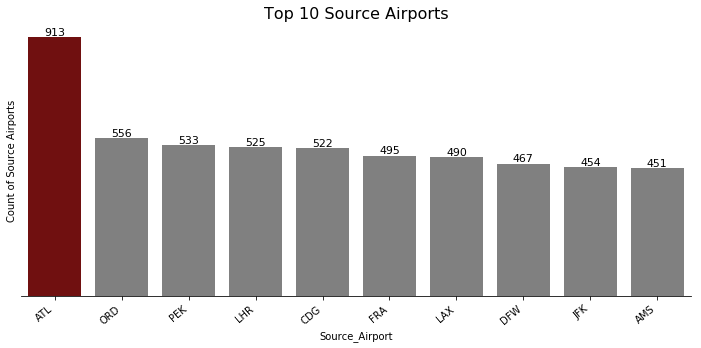

In [49]:
# Most Active Airports Based on Departures (Source Airports)

fig=plt.figure(figsize=(12,5))
ax=sns.countplot(x=air_master_df['Source_Airport'], data=air_master_df, order=pd.value_counts(air_master_df['Source_Airport']).iloc[0:10].index, 
              palette=['maroon', 'gray', 'gray','gray','gray','gray','gray','gray','gray','gray'] )
plt.ylabel('Count of Source Airports')
plt.title("Top 10 Source Airports", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()) -2), fontsize=11, color='black', ha='center', va='bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True)
ax.set_yticks([])
plt.savefig('Top 10 Source Airports.png')

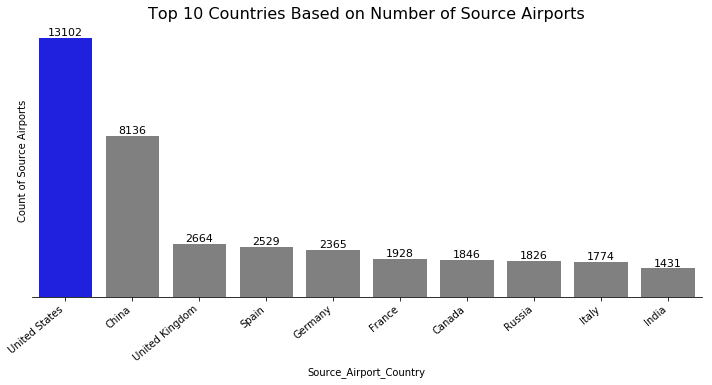

In [50]:
# Top 10 Countries According to Source Airport Data

fig=plt.figure(figsize=(12,5))
ax=sns.countplot(x=air_master_df['Source_Airport_Country'], data=air_master_df, order=pd.value_counts(air_master_df['Source_Airport_Country']).iloc[0:10].index, 
              palette=['blue', 'gray', 'gray','gray','gray','gray','gray','gray','gray','gray'] )
plt.ylabel('Count of Source Airports')
plt.title("Top 10 Countries Based on Number of Source Airports", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()) -2), fontsize=11, color='black', ha='center', va='bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True)
ax.set_yticks([])
plt.savefig('Top 10 Countries Bases On Number of Source Airports.png')

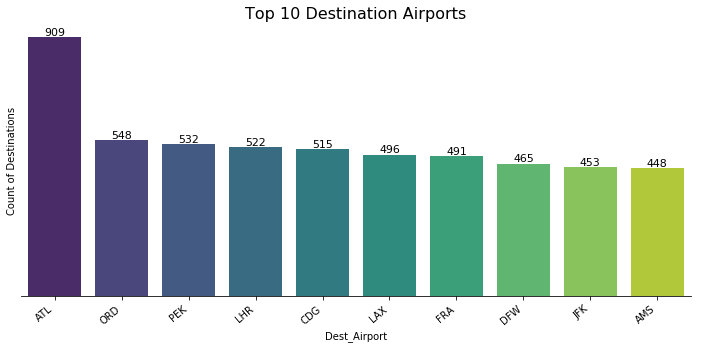

In [60]:
# Most Active Airports Based on Arrivals (Destination Airports)

fig=plt.figure(figsize=(12,5))
ax=sns.countplot(x=air_master_df['Dest_Airport'], data=air_master_df, order=pd.value_counts(air_master_df['Dest_Airport']).iloc[0:10].index, 
              palette= 'viridis' )
plt.ylabel('Count of Destinations')
plt.title("Top 10 Destination Airports", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()) -2), fontsize=11, color='black', ha='center', va='bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True)
ax.set_yticks([])
plt.savefig('Top 10 Destinations.png', bbox_inches='tight')

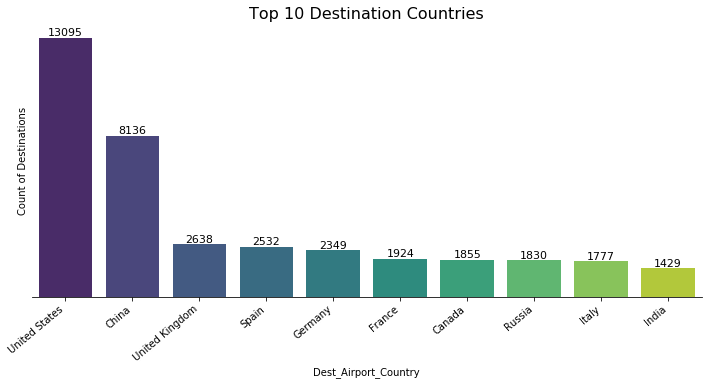

In [61]:
# Most Active Airports Based on Arrivals (Destination Countries)

fig=plt.figure(figsize=(12,5))
ax=sns.countplot(x=air_master_df['Dest_Airport_Country'], data=air_master_df, order=pd.value_counts(air_master_df['Dest_Airport_Country']).iloc[0:10].index, 
              palette= 'viridis' )
plt.ylabel('Count of Destinations')
plt.title("Top 10 Destination Countries", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()) -2), fontsize=11, color='black', ha='center', va='bottom')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.despine(left=True)
ax.set_yticks([])
plt.savefig('Top 10 Destinations.png', bbox_inches='tight')

In [62]:
airlinebycountry= air_master_df.groupby('Airline_Country')['Airline_Name'].nunique().sort_values(ascending = False).iloc[0:10]

In [63]:
print(airlinebycountry)

Airline_Country
United States     52
Russia            29
Canada            19
China             16
United Kingdom    15
France            15
Brazil            12
Japan             12
Germany           11
Italy             11
Name: Airline_Name, dtype: int64


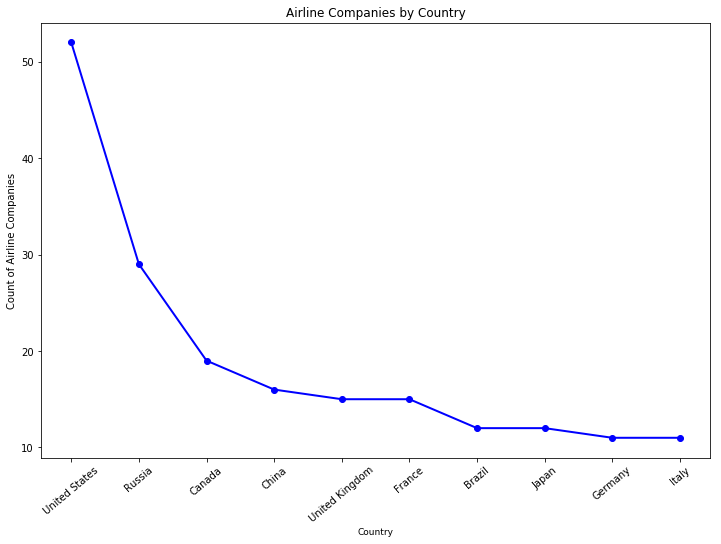

In [64]:
airlinebycountry.plot(figsize=(12,8), title='Airline Companies by Country', linewidth=2.0, marker='o', color='blue')

country = ['United States', 'Russia', 'Canada', 'China', 'United Kingdom', 'France', 'Brazil', 'Japan', 'Germany', 'Italy']
plt.xticks(range(len(country)), country, rotation = 40)
plt.xlabel('Country', fontsize=9)
plt.ylabel('Count of Airline Companies')
plt.savefig('Airline Companies by Country.png', bbox_inches='tight')

US Section of Data

In [65]:
# create the us dataset
us_data = air_master_df[air_master_df['Source_Airport_Country'] == 'United States']

In [66]:
# count the number of flights per source airport
flight_counts = us_data['Source_Airport'].append(us_data.loc[us_data['Source_Airport'] != us_data['Dest_Airport'], 'Dest_Airport']).value_counts()

In [67]:
us_data['Source_Airport_Tz'].value_counts()

America/New_York       6147
America/Chicago        3172
America/Los_Angeles    1901
America/Denver          756
America/Anchorage       577
America/Phoenix         333
Pacific/Honolulu        216
America/Adak              2
Name: Source_Airport_Tz, dtype: int64

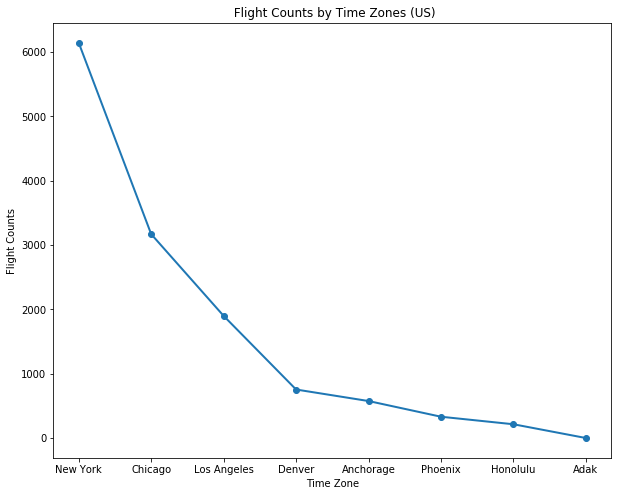

In [68]:
# group flights by Source Airport Time Zone and Plot it

zones= us_data.groupby('Source_Airport_Tz')['Source_Airport_Tz'].count().sort_values(ascending = False)
zones.plot(figsize=(10,8), title=' Flight Counts by Time Zones (US)', linewidth=2.0, marker = 'o')
time_zones =  ['New York', 'Chicago', 'Los Angeles', 'Denver', 'Anchorage',
              'Phoenix', 'Honolulu', 'Adak']

plt.xticks(range(len(time_zones)), time_zones)
plt.xlabel('Time Zone', fontsize=10)
plt.ylabel('Flight Counts', fontsize=10)
plt.savefig('Flight Counts by Time Zones - US.png', bbox_inches='tight')

In [69]:
timezoneofsourcebydest= us_data.groupby('Source_Airport_Tz')['Dest_Airport_Tz'].count().sort_values(ascending = False)

In [70]:
'''
time_zones = 'New York', 'Chicago', 'Los Angeles', 'Denver', 'Anchorage', 'Phoenix','Honolulu', 'Adak'
mycolors = ['darkblue', 'magenta', 'green', 'orange', 'yellow', 'red','purple', 'gray' ]
sns.set(style="white", context="talk")

timezoneofsourcebydest.plot(kind='bar', stacked=True, figsize=(12,6), color = mycolors)
plt.xlabel('Airline', fontsize = 12)
plt.ylabel('Flight Count', fontsize = 12)
plt.legend(time_zones, fontsize = 12)
plt.title("Flight Counts By Airline and Zone", fontsize = 14)
plt.xticks(rotation='horizontal', fontsize = 12)
'''

'\ntime_zones = \'New York\', \'Chicago\', \'Los Angeles\', \'Denver\', \'Anchorage\', \'Phoenix\',\'Honolulu\', \'Adak\'\nmycolors = [\'darkblue\', \'magenta\', \'green\', \'orange\', \'yellow\', \'red\',\'purple\', \'gray\' ]\nsns.set(style="white", context="talk")\n\ntimezoneofsourcebydest.plot(kind=\'bar\', stacked=True, figsize=(12,6), color = mycolors)\nplt.xlabel(\'Airline\', fontsize = 12)\nplt.ylabel(\'Flight Count\', fontsize = 12)\nplt.legend(time_zones, fontsize = 12)\nplt.title("Flight Counts By Airline and Zone", fontsize = 14)\nplt.xticks(rotation=\'horizontal\', fontsize = 12)\n'

In [71]:
toptenplanes = us_data['Plane_Name'].value_counts().iloc[0:10]
print(toptenplanes)

Airbus A320                  559
Boeing 737-800               489
Airbus A319                  471
Canadair Regional Jet 700    293
Embraer RJ145                216
Boeing 757                   199
Boeing 767-300               184
Saab SF340A/B                163
Boeing 717                   160
McDonnell Douglas MD-88      145
Name: Plane_Name, dtype: int64


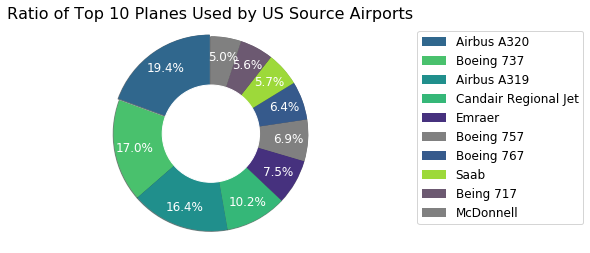

In [72]:
labels = 'Airbus A320', 'Boeing 737', 'Airbus A319', 'Candair Regional Jet', 'Emraer', 'Boeing 757', 'Boeing 767','Saab', 'Being 717', 'McDonnell'
colors = ['#30678D','#49C16D','#208F8C','#35B778','#46317E','gray','#365A8C','#9DD93A', '#6c5971', 'gray','purple']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
_, _, autotexts = plt.pie(toptenplanes,  colors=colors, explode= explode,
        autopct='%1.1f%%', shadow=True, startangle=90, radius=5.0, pctdistance=0.8, textprops={'fontsize': 12})
for autotext in autotexts:
    autotext.set_color('white')
    

plt.title("Ratio of Top 10 Planes Used by US Source Airports", fontsize = 16)
plt.legend(labels, loc='best', fontsize =12, bbox_to_anchor=(1.1,1))
formatting=plt.Circle( (0,0), 2.5, color='white')
p=plt.gcf()
p.gca().add_artist(formatting)
plt.axis('equal')
plt.savefig('Ratio of Top 10 Planes Used by US Source Airports.png', bbox_inches='tight')
plt.show()

In [73]:
al=us_data['Airline_Name'].unique().tolist()
print(al)

['Air Salone', 'Air Choice One', 'Fly Colombia ( Interliging Flights )', 'Silver Airways (3M)', 'Boutique Air (Priv)', nan, 'LAN Argentina', 'Interjet (ABC Aerolineas)', 'Airbus France', 'Era Alaska', 'Insel Air (7I/INC) (Priv)', 'Astair', 'Bering Air', 'Myway Airlines', 'Astral Aviation', 'Pinnacle Airlines', 'Cape Air', 'Volotea Costa Rica', 'Jet Airways', 'Aegean Airlines', 'American Airlines', 'Air Berlin', 'Air Canada', 'Air France', 'Air India Limited', 'AeroMéxico', 'Aerolineas Argentinas', 'Alaska Airlines', 'Royal Air Maroc', 'Avianca - Aerovias Nacionales de Colombia', 'Finnair', 'Alitalia', 'JetBlue Airways', 'British Airways', 'EVA Air', 'Caribbean Airlines', 'Air China', 'China Airlines', 'Copa Airlines', 'Cathay Pacific', 'China Southern Airlines', 'Condor Flugdienst', 'Delta Air Lines', 'Norwegian Air Shuttle', 'Aer Lingus', 'Emirates', 'Ethiopian Airlines', 'Etihad Airways', 'Frontier Airlines', 'Icelandair', 'Air Pacific', 'AirTran Airways', 'City Connexion Airlines', 

In [74]:
toptenairlines = us_data['Airline'].value_counts().iloc[0:10]
print(toptenairlines)

AA    1745
UA    1662
DL    1603
US    1602
WN    1133
FL     699
AS     509
G4     378
KL     348
AF     338
Name: Airline, dtype: int64


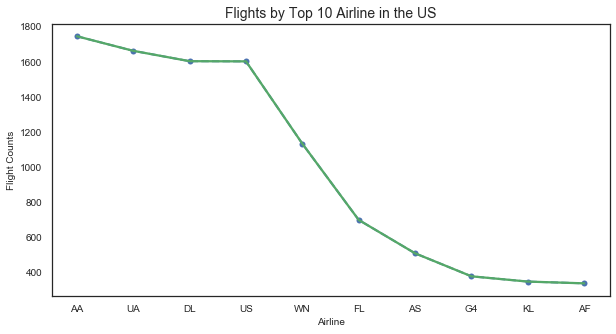

In [75]:
sns.set(style="white", context="talk")
airlines = ['AA', 'UA', 'DL', 'US', 'WN', 'FL','AS', 'G4', 'KL', 'AF']


ax= toptenairlines.plot(kind="line",figsize=(10,5), linestyle='--', marker='o', linewidth=2.0, markersize=6.0)
plt.title("Flights by Top 10 Airline in the US", fontsize = 14)

plt.xticks(range(len(airlines)), airlines)
plt.ylabel("Flight Counts", fontsize=10)
plt.xlabel("Airline", fontsize=10)
ax.tick_params(labelsize=10)

toptenairlines.plot()
plt.savefig('Flights by Top 10 Airline in the US.png', bbox_inches='tight')

In [76]:
# top airline names
toptenairlines_names = us_data['Airline_Name'].value_counts().iloc[0:10]
print(toptenairlines)

AA    1745
UA    1662
DL    1603
US    1602
WN    1133
FL     699
AS     509
G4     378
KL     348
AF     338
Name: Airline, dtype: int64


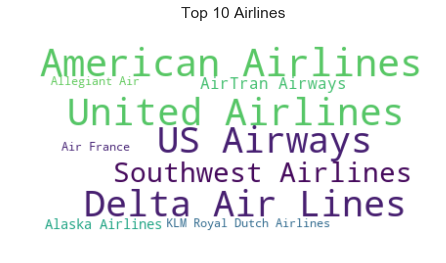

In [77]:
# generate word cloud from top 10 airlines
wordcloud = WordCloud(background_color="white",  max_font_size=90, random_state=42).generate_from_frequencies(toptenairlines_names)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 10 Airlines\n')
plt.tight_layout(pad=0)
plt.savefig('Top 10 Airlines.png', bbox_inches='tight')
plt.show()

In [78]:
# least used airlines
toptenairlines_names_least = us_data['Airline_Name'].value_counts().iloc[-10:]


In [83]:
print(toptenairlines_names_least)

Grupo TACA                         1
Air Europa                         1
Royal Air Maroc                    1
Overland Airways                   1
Pakistan International Airlines    1
TACV                               1
Myway Airlines                     1
Egyptair                           1
Volotea Costa Rica                 1
Thai Airways International         1
Name: Airline_Name, dtype: int64


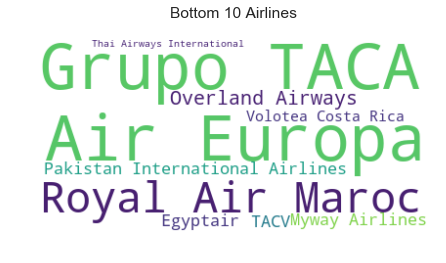

In [80]:
# generate word cloud least used airlines in the US
wordcloud = WordCloud(background_color="white",  max_font_size=90, random_state=42).generate_from_frequencies(toptenairlines_names_least)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Bottom 10 Airlines\n')
plt.tight_layout(pad=0)
plt.savefig('Bottom 10 Airlines.png',bbox_inches='tight')
plt.show()

# GRAPH and Degree Measures

In [84]:
# create new column for edges that would include source and destination airport
air_master_df['Edge'] = list(zip(air_master_df['Source_Airport'], air_master_df['Dest_Airport']))

In [85]:
# adding unique airports to a list
nodes = air_master_df['Source_Airport'].unique().tolist()

In [86]:
nodes_routes = routes_df['Source_Airport'].unique().tolist()

In [87]:
len(nodes)

3409

In [88]:
len(nodes_routes)

3409

In [89]:
# adding Edges ( tuples to a list)
edges = air_master_df['Edge'].tolist()

In [90]:
len(edges)

67759

In [91]:
# create an empty graph
G = nx.Graph()
print(type(G))
print(nx.info(G))

<class 'networkx.classes.graph.Graph'>
Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0



In [92]:
# add nodes and edges to our graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [93]:
# check the graph
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3425
Number of edges: 19257
Average degree:  11.2450


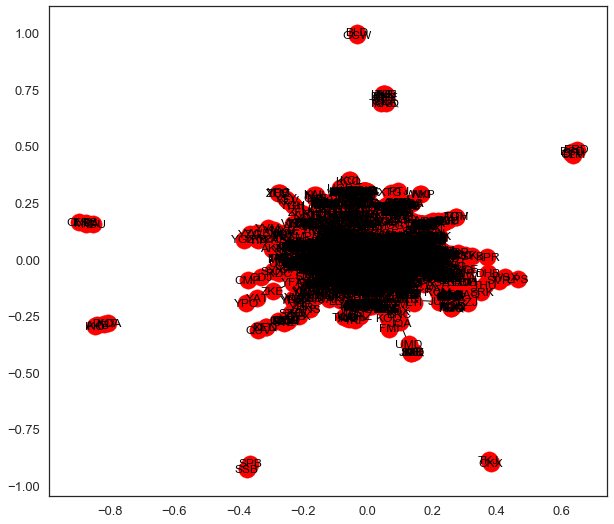

In [94]:
# plot the graph

plt.figure(figsize = (10,9))
nx.draw_networkx(G)
plt.savefig('Undirected Graph.png')

In [95]:
# check basic centrality measures of the graph

density = nx.density(G)
print("Network density:", round(density, 6))

Network density: 0.003284


In [96]:
degree_centrality = nx.degree_centrality(G)
#print(degree_centrality)

In [97]:
# average degree centrality of the graph
count = 0
_sum = 0
for key in degree_centrality:
    count += 1
    _sum += degree_centrality[key]

print('Average Degree Centrality of the graph: ', _sum/count)

Average Degree Centrality of the graph:  0.003284159901766728


In [98]:
# Get the eigenvector centralities for all the nodes
ev_centralities = nx.eigenvector_centrality(G)
#print(ev_centralities)

In [99]:
# average eigenvector centrality of the graph
count_ev = 0
sum_ev = 0
for key in ev_centralities:
    count_ev += 1
    sum_ev += ev_centralities[key]

print('Average Eigenvector Centrality of the graph: ', round(sum_ev/count_ev,4))

Average Eigenvector Centrality of the graph:  0.0061


In [100]:
# average coustering coefficient of the graph
print("Average Clustering Coefficient of the Graph:", round(nx.average_clustering(G),4))

Average Clustering Coefficient of the Graph: 0.4871


In [101]:
betweenness_centrality = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

In [102]:
# average betweenness centrality of the graph
count_bt = 0
sum_bt = 0
for key in betweenness_centrality:
    count_bt += 1
    sum_bt += betweenness_centrality[key]

print('Average Betweenness Centrality of the graph: ', round(sum_bt/count_bt, 4))

Average Betweenness Centrality of the graph:  0.0009


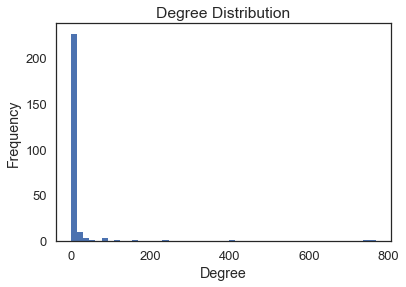

In [103]:
plt.hist(nx.degree_histogram(G), bins= 50)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig('Degree Distribution - Histogram.png',bbox_inches='tight' )
plt.show()

Since this plot is not very visible and cannot help us prove that the network is exhibiting the power law, we can plot a CCDF and nicely see the distribution without loosing any information.

In [104]:
#print(nx.degree(G))

In [105]:
G_degrees = nx.degree(G)

In [106]:
# create the list of degrees from the tuple of nodes and degrees of the graph
degree_list = list(zip(*G_degrees))[1]
#print (degree_list)

In [107]:
list_degree = list(degree_list)

In [108]:
#print(list_degree)

In [109]:
list_degree.sort(reverse = True)
#print(list_degree)

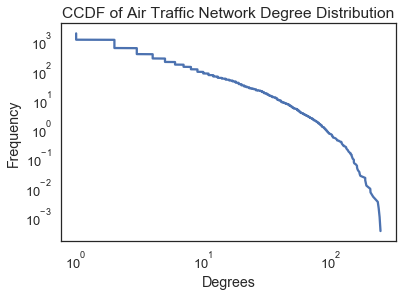

In [110]:
# plot CCDF of Degree Distribution
from numpy import cumsum

n = len(list_degree)

cdf=np.linspace(1/n, 1.0, num=n)

y_axis = np.cumsum(cdf)

plt.plot(list_degree, y_axis)

plt.xscale("log")
plt.yscale("log")

plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title ('CCDF of Air Traffic Network Degree Distribution')
plt.savefig('CCDF of Air Traffic Network Degree Distribution.png')